In [18]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


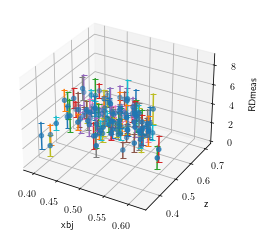

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    RDxz = json.load(j_RD)
#with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    #RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        
        z_hadron = float(key_z)
        
        for key_RunG,RunG_value in z_value.items():
            RD=float(RunG_value["value"])
            RD_error = float(RunG_value["error"])
            RDs.append(float(RunG_value["value"]))
            RDs_error.append(float(RunG_value["error"]))
            xbj_corr = float(RunG_value["xbj_corr"])
            z_corr = float(RunG_value["z_corr"])
            xs.append(xbj_corr)
            zs.append(z_corr)
            ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
#plt.savefig("RD_xbj_z")

4.0


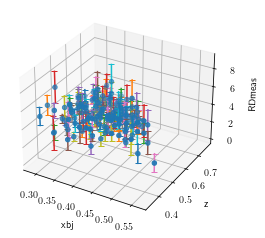

4.75


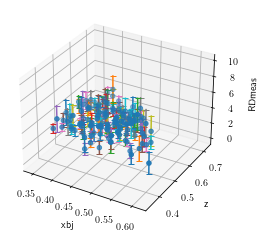

5.5


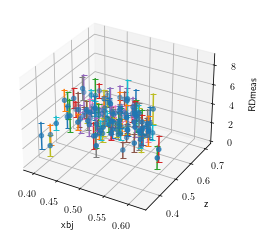

In [20]:
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
        RDxz = json.load(j_RD)

    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
        
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                xs.append(xbj_corr)
                zs.append(z_corr)
                ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    plt.show()
    #plt.savefig("RD_xbj_z_"+str(Q2)+".png")

In [21]:
inits = (1,-1,0)

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_6733/2678469075.py:74: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2.migrad()
No handles with labels found to put in legend.


0.5837118245619344 -1.1843411944957083 1.6741085597307102
['$\\chi^2$ / $n_\\mathrm{dof}$ = 254.7 / 164']


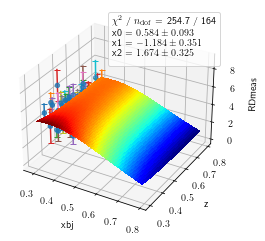

In [23]:
from iminuit import Minuit

def RDmeas_CSV(Q,z_had,xbj,params,pdf,ff):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    #delta_z = z_had**a*(1-z_had)**b
    #delta_z = z_had**a*(1+z_had)**b
    #delta_z = a
    #Dz = (1-delta_z)/(1+delta_z)
    #Dz = a+b*z_had/(1+z_had)
    Dz = params[0]+params[1]*z_had+params[2]*z_had**2
    CSVx = 0
    #(1-xbj)**c*xbj**d 
    B_NS = 5*(pdf.xfxQ(-2,xbj,Q)+pdf.xfxQ(-1,xbj,Q))/(pdf.xfxQ(1,xbj,Q)+pdf.xfxQ(2,xbj,Q))
    B_sz = (ff.xfxQ(3,z_had,Q)+ff.xfxQ(-3,z_had,Q))/ff.xfxQ(2,z_had,Q)/(1+ff.xfxQ(-2,z_had,Q)/ff.xfxQ(2,z_had,Q)) 
    B_S = B_sz*(pdf.xfxQ(3,xbj,Q)+pdf.xfxQ(-3,xbj,Q))/(pdf.xfxQ(1,xbj,Q)+pdf.xfxQ(2,xbj,Q))
    Bx = 5/2+B_NS+B_S
    Ax = -4/(3*(pdf.xfxQ(2,xbj,Q)+pdf.xfxQ(1,xbj,Q)))
    return (Bx-Ax*CSVx)/Dz-2.5
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []

for key_xbj,xbj_value in RDxz["4.000000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        
        z_hadron = float(key_z)
        
        for key_RunG,RunG_value in z_value.items():
            RD=float(RunG_value["value"])
            RD_error = float(RunG_value["error"])
            RDs.append(float(RunG_value["value"]))
            RDs_error.append(float(RunG_value["error"]))
            xbj_corr = float(RunG_value["xbj_corr"])
            z_corr = float(RunG_value["z_corr"])
            xs.append(xbj_corr)
            zs.append(z_corr)
            ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
def least_squares_Q2(params):
    least_square = 0
    for key_xbj,xbj_value in RDxz["4.000000"].items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
        
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                
                Q2_corr = float(RunG_value["Q2_corr"])
                Q = math.sqrt(Q2_corr)
                
                least_square += (RD-RDmeas_CSV(Q,z_hadron,xbj,params,p_cteq6,JAM20)) ** 2 / RD_error**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,inits)
#m_Q2 = Minuit(least_squares_Q2,a = init[0],b = init[1],c = init[2],d = init[3])
#m_Q2 = Minuit(least_squares_Q2,a = 0.7,b = -0.61,c = 0,d = 0)
#m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])



x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,p_cteq6,JAM20))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()



/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_6733/3248369069.py:60: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2.migrad()
No handles with labels found to put in legend.


0.5837118245619344 -1.1843411944957083 1.6741085597307102
['$\\chi^2$ / $n_\\mathrm{dof}$ = 254.7 / 164']


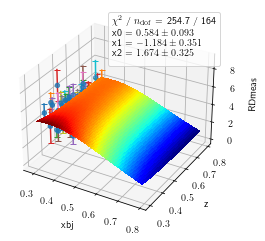

No handles with labels found to put in legend.


0.5489360422445024 -1.088616800188609 1.5952071093487858
['$\\chi^2$ / $n_\\mathrm{dof}$ = 205.8 / 148']


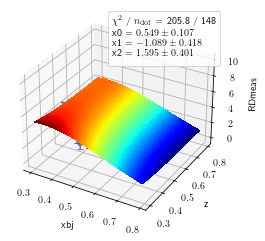

0.3831548795390193 -0.4781887530743688 1.1155002211971108


No handles with labels found to put in legend.


['$\\chi^2$ / $n_\\mathrm{dof}$ = 201.0 / 121']


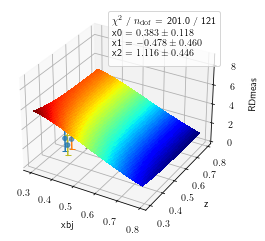

In [42]:
Qs = []
parameters = []
param_errs = []
kaisquare = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
   
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    Qs.append(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
            
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                xs.append(xbj_corr)
                zs.append(z_corr)
                ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    def least_squares_Q2(params):
        least_square = 0
        for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            for key_z,z_value in xbj_value.items():
        
                z_hadron = float(key_z)
        
                for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
                
                    least_square += (RD-RDmeas_CSV(Q,z_hadron,xbj,params,p_cteq6,JAM20)) ** 2 / RD_error**2
        return least_square
    m_Q2 = Minuit(least_squares_Q2,inits)
    #m_Q2 = Minuit(least_squares_Q2,a = init[0],b = init[1],c = init[2],d = init[3])
    #m_Q2 = Minuit(least_squares_Q2,a = 0.7,b = -0.61,c = 0,d = 0)
    #m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
    m_Q2.migrad()
    m_Q2.hesse()
    print(*m_Q2.values)
    #print(m_Q2.values["a"])
    parameters.append(m_Q2.values)
    param_errs.append(m_Q2.errors)
    #print(m_Q2.values["a"])
    
    kaisquare.append(m_Q2.fval)


    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,p_cteq6,JAM20))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
    #plt.plot(zs,fit_RDmeas,label = "fit")
    #print(xs) 
    #print(zs)
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
    ]
    print(fit_info)
    for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    plt.legend(title="\n".join(fit_info))

     
    plt.show()




4.0
0


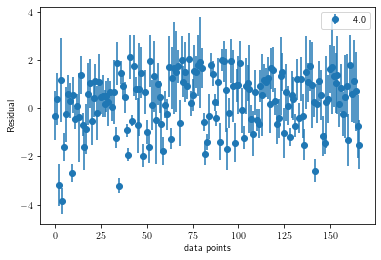

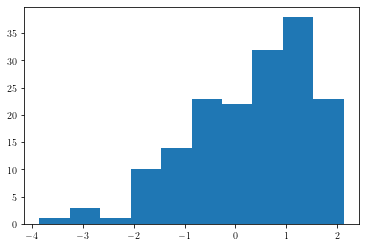

4.75
1


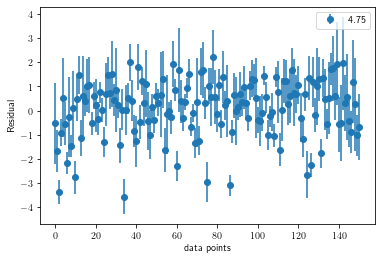

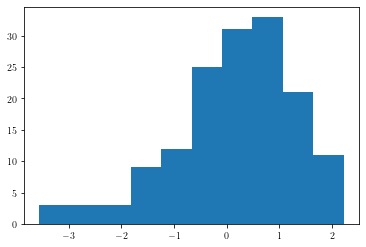

5.5
2


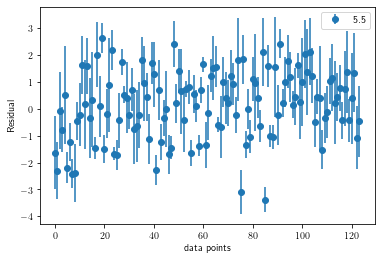

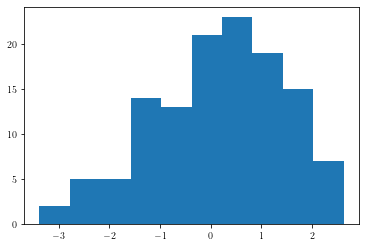

In [43]:
i_Q2 = 0
#Residual_iminuit = []
#Residual_error_iminuit = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    print(i_Q2)
    params = parameters[i_Q2]
    
    for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            for key_z,z_value in xbj_value.items():
        
                z_hadron = float(key_z)
        
                for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
            
                    Residual_error.append(RD_error)
            
                    RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,params,p_cteq6,JAM20)
                    Residual.append((RD-RDmeas_CSV_fit)/RD_error)
                    Residual_count.append(i_count)
                    #Residual_iminuit[i_Q2].append(Residual)
                    i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(Residual_count,Residual,Residual_error,fmt='o',label = Q2)
    plt.xlabel("data points")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1
    
    
    fig,ax = plt.subplots()
    #n,bins,patches = ax.hist(Residual,50,density = True)
    #ax.plot(bins,Residual)
    plt.hist(Residual,10)
    plt.show()

4.0
4.75
5.5


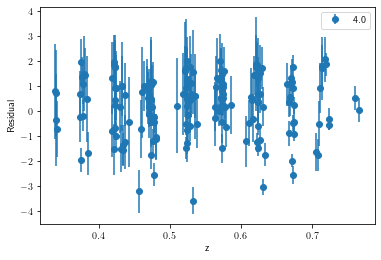

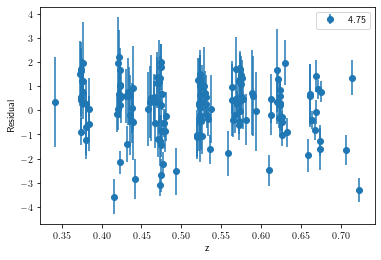

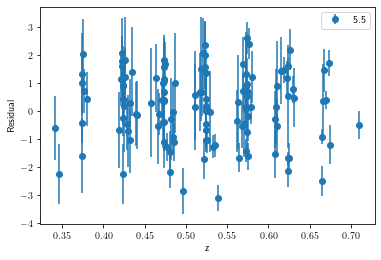

In [44]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    params = parameters[i_Q2]
    
    for key_xbj,xbj_value in Q2_value.items():
       
        for key_z,z_value in xbj_value.items():
            
            for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                    xbj = xbj_corr
                    z_hadron = z_corr
                    xs.append(xbj)
                    zs.append(z_hadron)
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
            
                    Residual_error.append(RD_error)
            
                    RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,params,p_cteq6,JAM20)
                    Residual.append((RD-RDmeas_CSV_fit)/RD_error)
                    Residual_count.append(i_count)
                    #Residual_iminuit[i_Q2].append(Residual)
                    i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(zs,Residual,Residual_error,fmt='o',label = Q2)
    plt.xlabel("z")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1

4.0
4.75
5.5


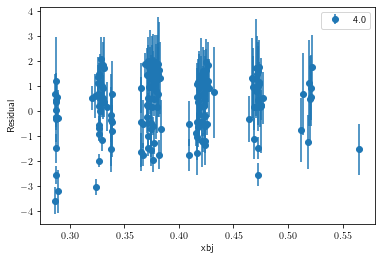

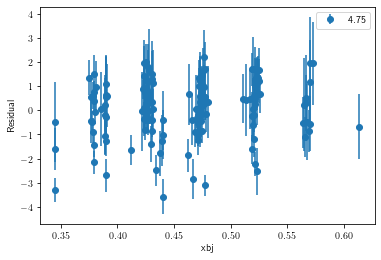

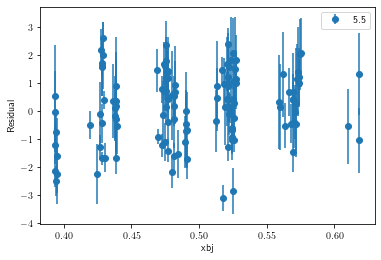

In [45]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    params = parameters[i_Q2]
    
    for key_xbj,xbj_value in Q2_value.items():
       
        for key_z,z_value in xbj_value.items():
            
            for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                    xbj = xbj_corr
                    z_hadron = z_corr
                    xs.append(xbj)
                    zs.append(z_hadron)
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
            
                    Residual_error.append(RD_error)
            
                    RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,params,p_cteq6,JAM20)
                    Residual.append((RD-RDmeas_CSV_fit)/RD_error)
                    Residual_count.append(i_count)
                    #Residual_iminuit[i_Q2].append(Residual)
                    i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(xs,Residual,Residual_error,fmt='o',label = Q2)
    plt.xlabel("xbj")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1

In [46]:
print(len(Qs))
print("Q2   parameters   parameter_errors")

for i in range(len(Qs)):
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*parameters[i])
    #print(f"{parameter_a[i]:.5f}"," ",f"{parameter_b[i]:.5f}"," ",f"{parameter_c[i]:.5f}"," ",f"{parameter_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*param_errs[i])
    #print(f"{err_a[i]:.5f}"," ",f"{err_b[i]:.5f}"," ",f"{err_c[i]:.5f}"," ",f"{err_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")

3
Q2   parameters   parameter_errors
4.0 0.5837118245619344 -1.1843411944957083 1.6741085597307102
4.0 0.09266637987402207 0.3510966374369915 0.3252304867141819
4.75 0.5489360422445024 -1.088616800188609 1.5952071093487858
4.75 0.10691332356738771 0.4177676123864132 0.40102716394543886
5.5 0.3831548795390193 -0.4781887530743688 1.1155002211971108
5.5 0.11757181952837299 0.4601689782369085 0.44575109266409113


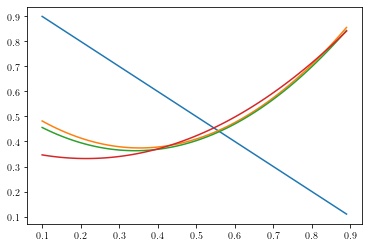

In [47]:
#this one should change with change of fitting func
def Dz(z_had, params):
    return params[0]+params[1]*z_had+params[2]*z_had**2
z_had = np.arange(0.1,0.9,0.01)
plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz(z_had,parameters[0]))
plt.plot(z_had,Dz(z_had,parameters[1]))
plt.plot(z_had,Dz(z_had,parameters[2]))